# **Exploratory Data Analysis**

# *Visualizations*

Import necessary packages

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
from scipy.interpolate import UnivariateSpline
from fitter import Fitter

Questions to answer:

How does visiblity correlate with season's and perhaps Humidity(%),Wind speed (m/s)

In [3]:
data = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')
print(data.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(ï¿½C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


Structure for line of best fit:

Calculate the coefficients of the line of best fit

m, b = np.polyfit(x,y, 1)

C:\Users\lordw\AppData\Local\Temp\ipykernel_22676\2943774186.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


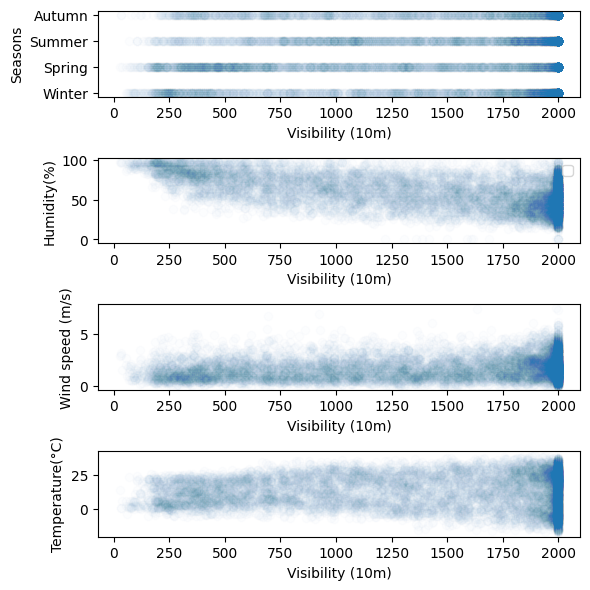

In [4]:
fig, axs = plt.subplots(4, 1, figsize=(6,6))

axs[0].scatter(data['Visibility (10m)'], data['Seasons'], alpha = 0.01)
axs[0].set_xlabel("Visibility (10m)")
axs[0].set_ylabel("Seasons")
axs[1].legend()

axs[1].scatter(data['Visibility (10m)'], data['Humidity(%)'], alpha = 0.01)
axs[1].set_xlabel("Visibility (10m)")
axs[1].set_ylabel("Humidity(%)")

axs[2].scatter(data['Visibility (10m)'], data['Wind speed (m/s)'], alpha = 0.01)
axs[2].set_xlabel("Visibility (10m)")
axs[2].set_ylabel("Wind speed (m/s)")

axs[3].scatter(data['Visibility (10m)'], data['Temperature(C)'], alpha = 0.01)
axs[3].set_xlabel("Visibility (10m)")
axs[3].set_ylabel("Temperature(°C)")

plt.tight_layout()
plt.show()

Spring and Winter seem to experience greater variability in Visibility rates

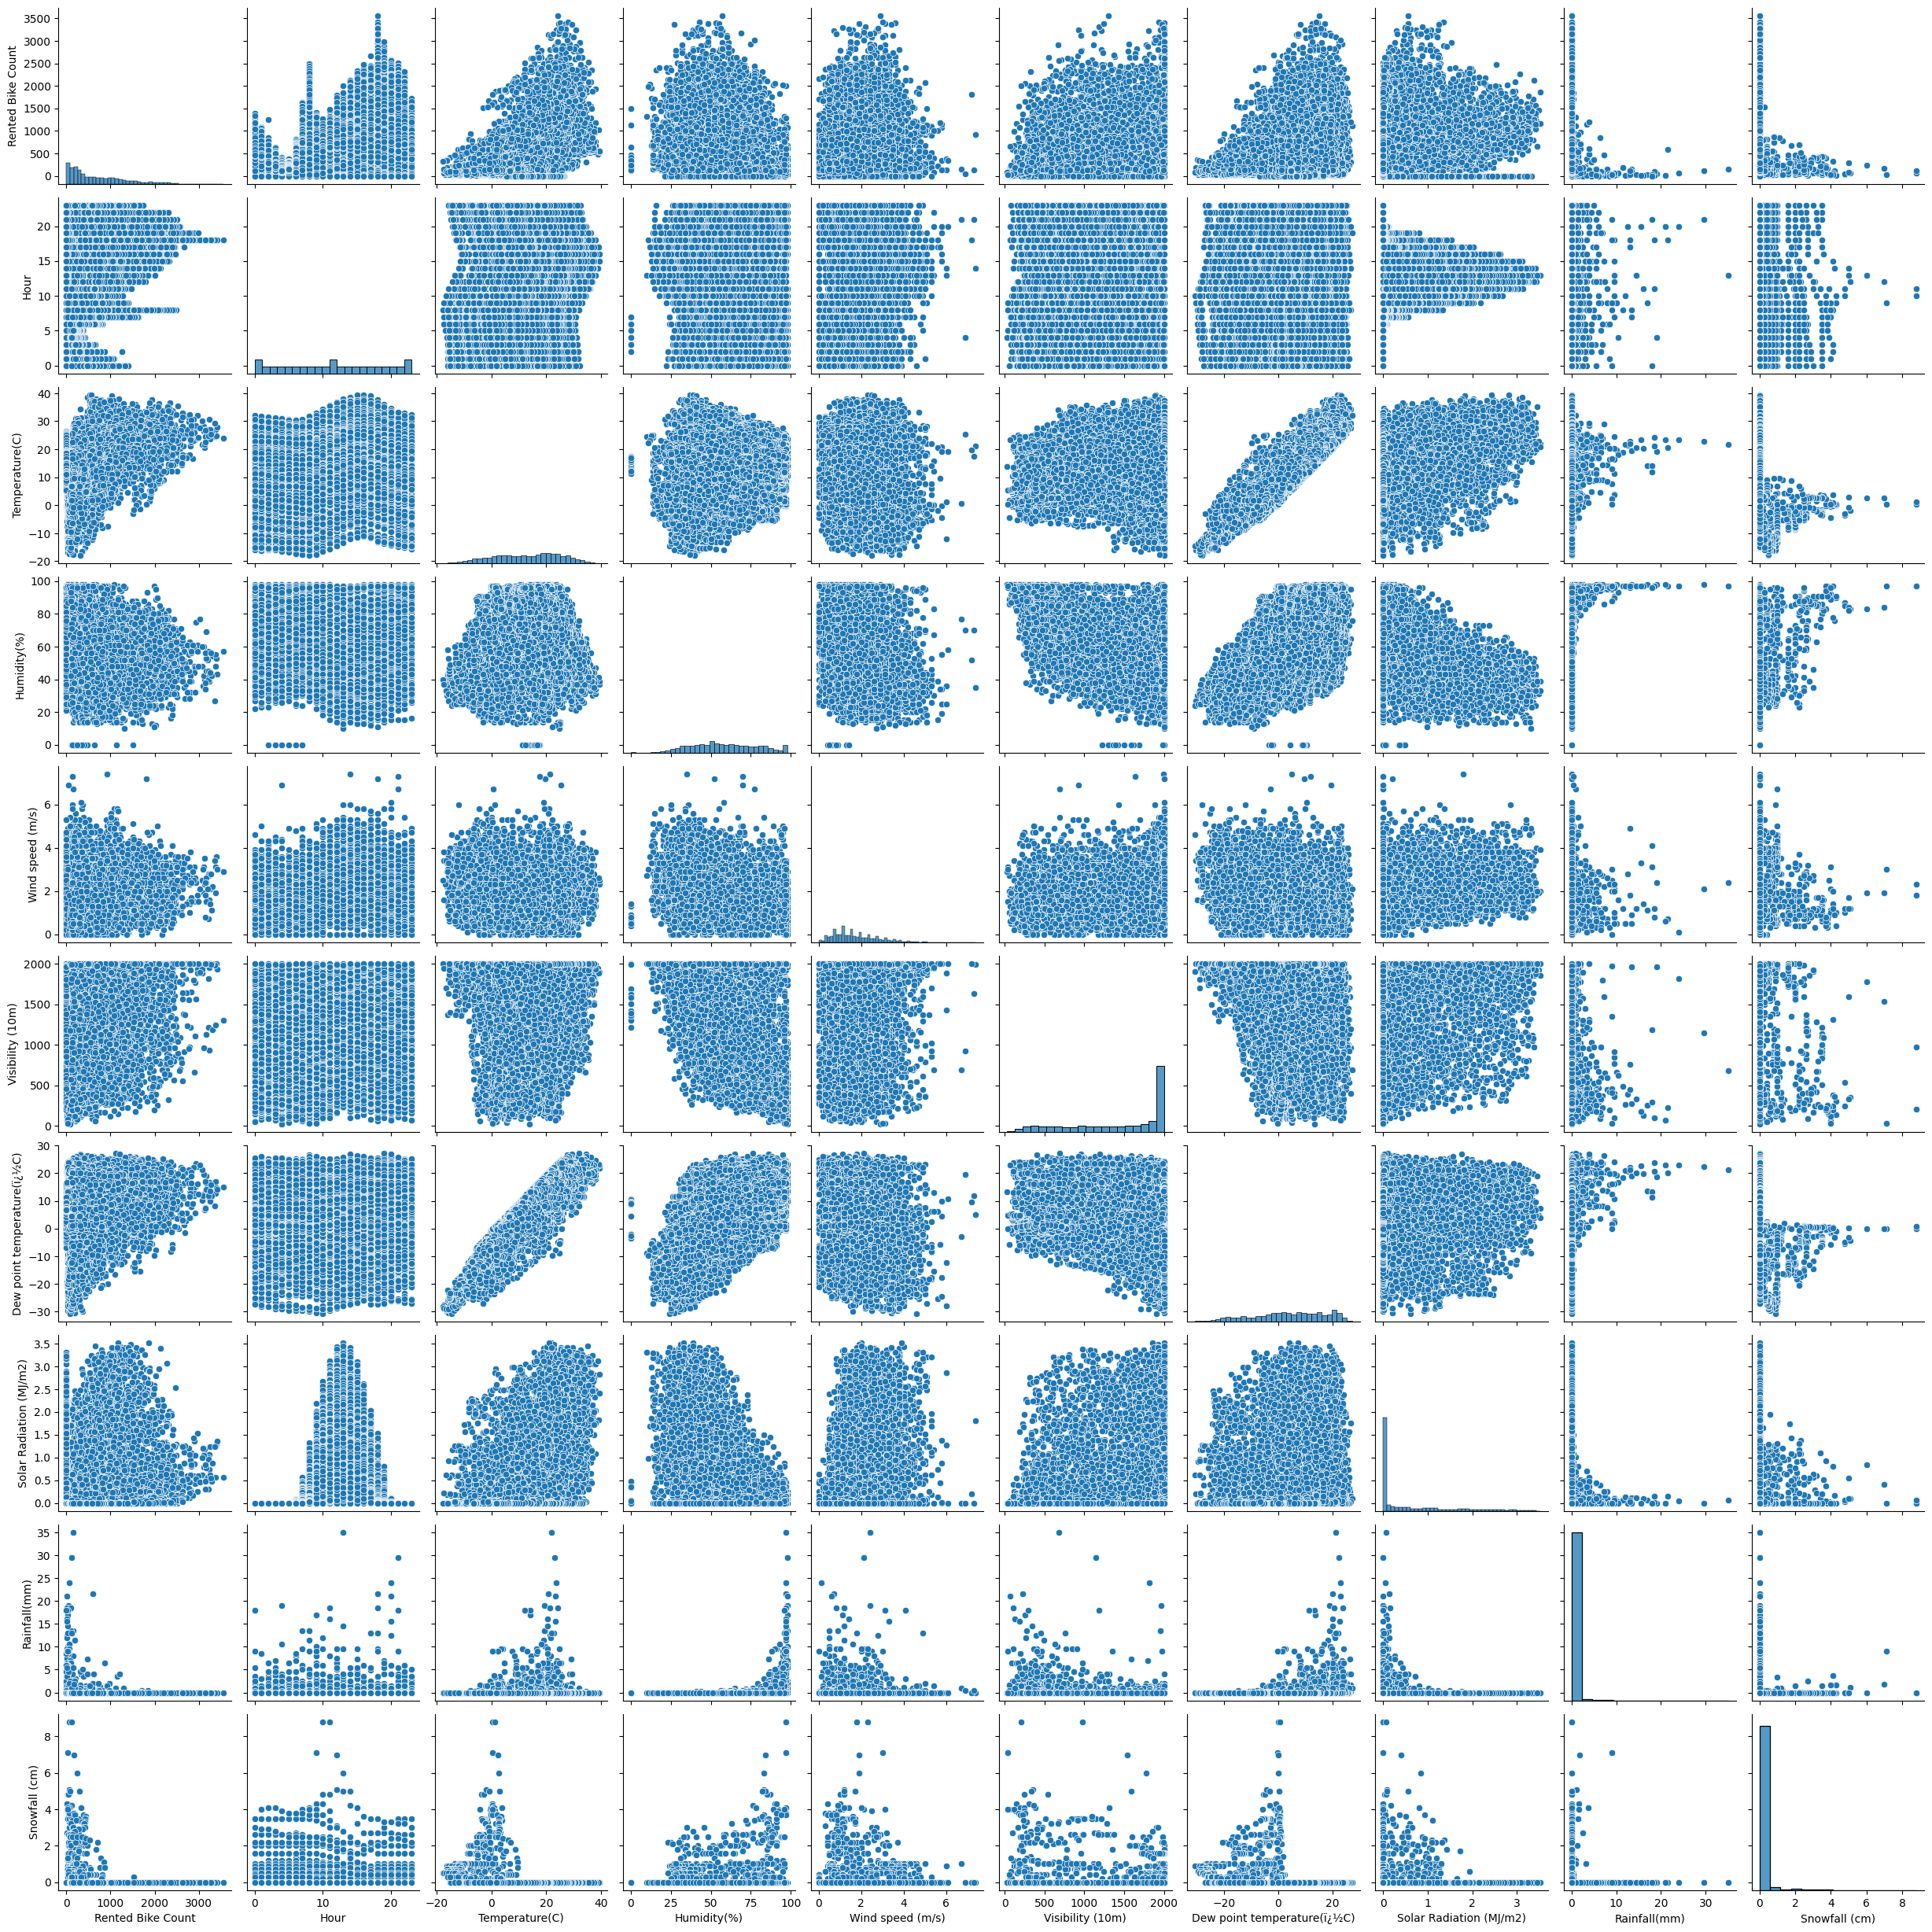

In [8]:
sns.pairplot(data)

Interesting Plots:

Hour vs Solar Radiation

C:\Users\lordw\AppData\Local\Temp\ipykernel_22676\2161540194.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


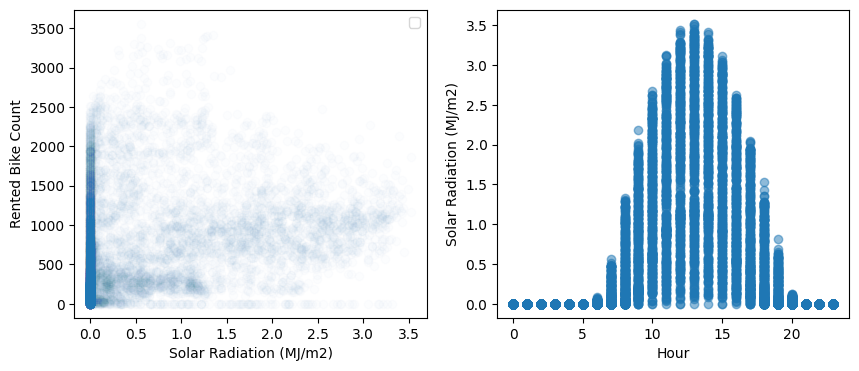

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].scatter(data['Solar Radiation (MJ/m2)'], data['Rented Bike Count'], alpha = 0.01)
axs[0].set_xlabel("Solar Radiation (MJ/m2)")
axs[0].set_ylabel("Rented Bike Count")
axs[0].legend()

axs[1].scatter(x=data['Hour'], y=data['Solar Radiation (MJ/m2)'], alpha=0.5)
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Solar Radiation (MJ/m2)')
plt.show()

Plot out distributional relationships of quantitative variables to determine skew and model decision

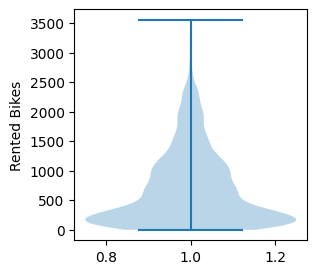

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
axs.violinplot(data['Rented Bike Count'])
axs.set_ylabel("Rented Bikes")
plt.show()

Lot of rented bike rates are pretty low, but I wonder in which season the higher and lower one's occur

In [7]:
print(data['Seasons'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']


In [8]:
mean_summer = np.mean(data.loc[data['Seasons'] == 'Summer']['Rented Bike Count'])
mean_winter = np.mean(data.loc[data['Seasons'] == 'Winter']['Rented Bike Count'])
mean_spring = np.mean(data.loc[data['Seasons'] == 'Spring']['Rented Bike Count'])
mean_autumn = np.mean(data.loc[data['Seasons'] == 'Autumn']['Rented Bike Count'])
print(f'Mean rented bike count in Summer: {mean_summer:.2f}')
print(f'Mean rented bike count in Winter: {mean_winter:.2f}')
print(f'Mean rented bike count in Spring: {mean_spring:.2f}')
print(f'Mean rented bike count in Autumn: {mean_autumn:.2f}')
print("Summer is going to be the majority of high bike rental rates follow by Autumn, Spring, and then most obviously Winter")

Mean rented bike count in Summer: 1034.07
Mean rented bike count in Winter: 225.54
Mean rented bike count in Spring: 730.03
Mean rented bike count in Autumn: 819.60
Summer is going to be the majority of high bike rental rates follow by Autumn, Spring, and then most obviously Winter


Did Covid-19 start in Seoul from 2017 to 2018?

I also think it would be worth it to create a new column for month as it can be a more of a filtering feature alongside season

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year
print(f"Data Columns {data.columns}")

Data Columns Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(ï¿½C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day', 'Year'],
      dtype='object')


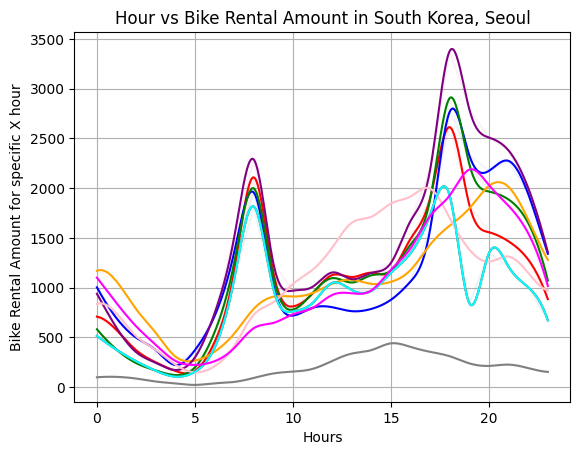

In [10]:
rand_days = np.random.choice(data['Date'], size = 10, replace=False)
sequences = []

for i in range(len(rand_days)):
    vals = data.loc[data['Date'] == rand_days[i]]
    sequences.append([vals[['Hour','Rented Bike Count','Day','Month']].values])

# Sequences stores 10 random day samples that have 24 data points each for each hour
# I'm going to plot them to see how the hours relate to the bike rentals

num_day_strms = 10

xValues = []
yValues = []
for i in range(num_day_strms):

    oneDayX = []
    oneDayY = []
    for j in range(24):
        # 1 sequence
        # 10 day lists in the 1 sequence for the 10 days sampled
        # 24 hours in each day list
        # 4 values in each hour list: hour, rented bike count, day, month

        oneDayX.append(sequences[i][0][j][0:1]) # Hours
        oneDayY.append(sequences[i][0][j][1:2]) # Rented Bike Count
    xValues.append(oneDayX)
    yValues.append(oneDayY)

#All the days have been added to the X and Y valued lists

# Define a list of colors  
# 10 distinct colors
color_list = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

for day in range(10):
    spline = UnivariateSpline(xValues[day], yValues[day], s=0)

    x_smooth = np.linspace(min(xValues[day]), max(xValues[day]), 500)
    y_smooth = spline(x_smooth) 

    color = color_list[day]  # Use the 'day' index to get the correct color
    #plt.scatter(xValues[day], yValues[day], alpha=0.001, label=f'Day {day + 1}', color=color)
    plt.plot(xValues[day], yValues[day], color=color, alpha=0.05)
     
    # Plot the spline
    plt.plot(x_smooth, y_smooth, color=color, label='Spline', alpha=1)  
    #plt.plot(xValues[day-1:day+1], yValues[day-1:day+1], color=color)

plt.xlabel("Hours")
plt.ylabel("Bike Rental Amount for specific X hour")
plt.title("Hour vs Bike Rental Amount in South Korea, Seoul")
plt.grid()
plt.show()

At around 8pm and 6pm we can see that inside of Seoul, South Korea bike rental rates per hour seem to spike. This could have something to do with the meal culture in South Korea. A question I have is wether these spikes occur after typical eating times in Seoul, where people are going to and from restaurants. Additionally, could it have a spike around 6pm because work ends around there?

Questions:

Could there be a correlation between holidays and bike rates?

In [11]:
HolBike = data.loc[data['Holiday'] == 'Holiday']['Rented Bike Count']
HolBikeTotal = sum(HolBike)
HolBTmean = HolBike.describe()[2]
HoldBTstd = HolBike.describe()[1]

nHolBike = data.loc[data['Holiday'] == 'No Holiday']['Rented Bike Count']
nHolBikeTotal = sum(nHolBike)
nHolBTmean = nHolBike.describe()[2]
nHolBTstd = nHolBike.describe()[1]


print(f"Total Rented Bikes on holiday: {HolBikeTotal:.2f}")
print(f"Standard Deviation of Rented Bike on Holidays: {HoldBTstd:.2f}")
print(f"Mean of Rented Bike on Holidays: {HolBTmean:.2f}")
print(f"Total Rented Bikes on holiday: {nHolBikeTotal:.2f}")
print(f"Standard Deviation of Rented Bike on Holidays: {nHolBTstd:.2f}")
print(f"Mean of Rented Bike on Holidays: {nHolBTmean:.2f}")

Total Rented Bikes on holiday: 215895.00
Standard Deviation of Rented Bike on Holidays: 499.76
Mean of Rented Bike on Holidays: 570.77
Total Rented Bikes on holiday: 5956419.00
Standard Deviation of Rented Bike on Holidays: 715.23
Mean of Rented Bike on Holidays: 646.88


C:\Users\lordw\AppData\Local\Temp\ipykernel_22676\372046433.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  HolBTmean = HolBike.describe()[2]
C:\Users\lordw\AppData\Local\Temp\ipykernel_22676\372046433.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  HoldBTstd = HolBike.describe()[1]
C:\Users\lordw\AppData\Local\Temp\ipykernel_22676\372046433.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nHolBTmean = nHolBike.describe()

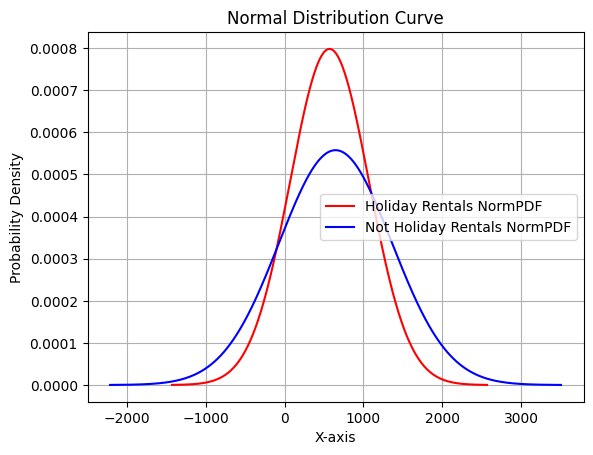

In [12]:

#------------------------------------------------------------------------------------
# Generate x values for the normal curve
HolidayRentalsX = np.linspace(HolBTmean - 4*HoldBTstd, HolBTmean + 4*HoldBTstd, 1000)
# Calculate the normal probability density function (PDF)
HolidayRentalsY = norm.pdf(HolidayRentalsX, HolBTmean, HoldBTstd)
#------------------------------------------------------------------------------------
# Generate x values for the normal curve
nHolidayRentalsX = np.linspace(nHolBTmean - 4*nHolBTstd, nHolBTmean + 4*nHolBTstd, 1000)
# Calculate the normal probability density function (PDF)
nHolidayRentalsY = norm.pdf(nHolidayRentalsX, nHolBTmean, nHolBTstd)


# Plot the normal curve
plt.plot(HolidayRentalsX, HolidayRentalsY, color='red', label='Holiday Rentals NormPDF')
plt.plot(nHolidayRentalsX, nHolidayRentalsY, color='blue', label='Not Holiday Rentals NormPDF')
plt.title('Normal Distribution Curve')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

The not Holiday curve has a larger standard deviation and a shorter bell curve compared to the holiday rentals curve. Greater likelihood for more biking rentals because the distribution is more spread. REMEMBER that this is the curve for TOTAL BIKE rentals per DAY not HOUR like we are trying to figure out here. So is predicted the distribution more effective?

How is temperature distributed?

In [13]:
print(data.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(ï¿½C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day', 'Year'],
      dtype='object')


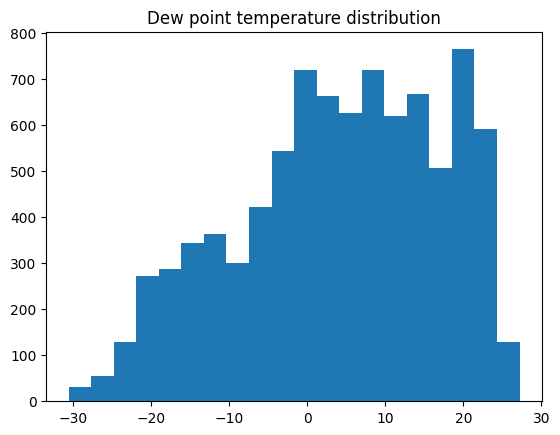

sumsquare_error         aic         bic    kl_div  ks_statistic  \
argus              0.002168  858.898318  880.132172  0.047743      0.024590   
beta               0.002200  868.481550  896.793355  0.041820      0.029566   
gausshyper         0.002253  866.151604  908.619311  0.048175      0.035397   
triang             0.002490  867.675478  888.909332  0.040663      0.069482   
genextreme         0.002840  873.532463  894.766317  0.047672      0.045997   

               ks_pvalue  
argus       4.925814e-05  
beta        4.366301e-07  
gausshyper  5.688725e-10  
triang      3.227976e-37  
genextreme  1.521599e-16

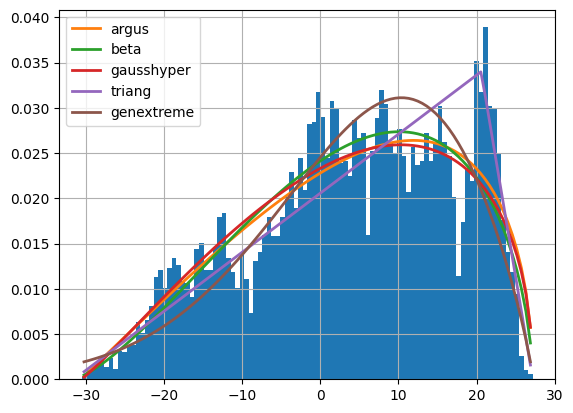

In [20]:
plt.hist(data['Dew point temperature(ï¿½C)'], bins=20)
plt.title('Dew point temperature distribution')
plt.show()

f_DPT = Fitter(data['Dew point temperature(ï¿½C)'])
f_DPT.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f_DPT.summary()

Very Clearly the distribution of Dew Point Temperature values is not normally distributed

- Argus seems to be the best distributional plot, so scaling on that function is best

I also want to find out the distribution that best fits the overall temperature

sumsquare_error         aic         bic    kl_div  ks_statistic  \
johnsonsb          0.001287  885.929136  914.240941  0.018273      0.030344   
exponweib          0.001441  874.508208  902.820013  0.022354      0.038641   
gennorm            0.001457  886.579133  907.812987  0.021465      0.057070   
gausshyper         0.001503  884.246342  926.714049  0.020920      0.038439   
beta               0.001505  880.178190  908.489995  0.020977      0.038466   

               ks_pvalue  
johnsonsb   1.928077e-07  
exponweib   8.426946e-12  
gennorm     3.058406e-25  
gausshyper  1.107209e-11  
beta        1.066984e-11

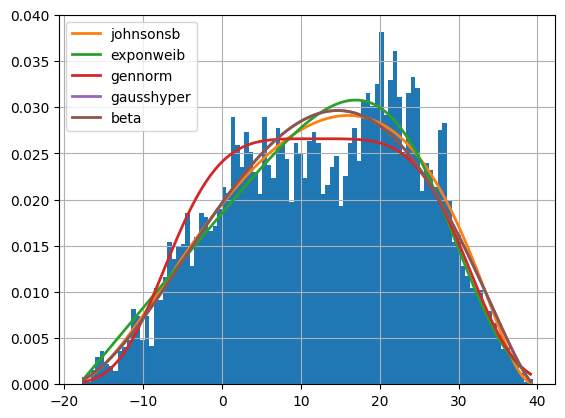

In [21]:
f_T = Fitter(data['Temperature(C)'])
f_T.fit()
f_T.summary()

Key Question: Can we actually scale the data points according to the distributions that excel here? Does it make sense that the data points for all later cases are going to be related to this distribution?

In [25]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(ï¿½C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day', 'Year'],
      dtype='object')

In [27]:
########## RUN ONLY ONCE ######################

# One-hot encode column 'SEASON'
one_hot_encoded = pd.get_dummies(data['Seasons'], prefix='Season', drop_first=False)
print(data['Seasons'].unique())
# Concatenate the original DataFrame with the one-hot encoded columns of SEASONS
data = pd.concat([data, one_hot_encoded], axis=1)

# Binary encoding of the Functioning day YES or NO
data['Functioning Day'] = (data['Functioning Day'] == 'Yes').astype(int)

# Binary encoding of the Holiday day NO HOLIDAY or HOLIDAY
data['Holiday'] = (data['Holiday'] == 'No Holiday').astype(int)

['Winter' 'Spring' 'Summer' 'Autumn']


In [28]:
# COLUMNS TO CONVERT TO BINARY: 0 or 1
bool_cols = ['Season_Autumn', 'Season_Spring','Season_Summer', 'Season_Winter']

# Actually changing to Binary
data[bool_cols] = data[bool_cols].astype(int)

# Create a new DataFrame for daily aggregation
daily = data.groupby(['Year', 'Month', 'Day']).agg(
    Rented_Bike_Count=('Rented Bike Count', 'sum'),
    Temperature_C=('Temperature(C)', 'mean'),
    Humidity_percent=('Humidity(%)', 'mean'),
    Wind_speed_m_s=('Wind speed (m/s)', 'mean'),
    Visibility_10m=('Visibility (10m)', 'mean'),
    Dew_point_temperature_C=('Dew point temperature(ï¿½C)', 'mean'),
    Solar_Radiation_MJ_m2=('Solar Radiation (MJ/m2)', 'mean'),
    Rainfall_mm=('Rainfall(mm)', 'mean'),
    Snowfall_cm=('Snowfall (cm)', 'mean'),
    Seasons=('Seasons', 'first'),  # Assuming seasons are consistent for the day
    Holiday=('Holiday', 'first'),  # Assuming holiday status is consistent for the day
    Functioning_Day=('Functioning Day', 'first'),  # Same for functioning day
    Season_Autumn=('Season_Autumn', 'mean'),  # Mean for one-hot encoded columns
    Season_Spring=('Season_Spring', 'mean'),
    Season_Summer=('Season_Summer', 'mean'),
    Season_Winter=('Season_Winter', 'mean')
).reset_index()

# Convert Temperatures to Farenheit

daily['Temperature_C'] = (daily['Temperature_C'] * (9/5)) + 32
daily['Dew_point_temperature_C'] = (daily['Dew_point_temperature_C'] * (9/5)) + 32

daily.head(2)

Year  Month  Day  Rented_Bike_Count  Temperature_C  Humidity_percent  \
0  2017     12    1               9539        27.5825         45.875000   
1  2017     12    2               8523        34.3850         61.958333   

   Wind_speed_m_s  Visibility_10m  Dew_point_temperature_C  \
0          1.5375     1870.750000                   7.6175   
1          1.7125     1471.083333                  21.7100   

   Solar_Radiation_MJ_m2  Rainfall_mm  Snowfall_cm Seasons  Holiday  \
0                0.24875          0.0          0.0  Winter        1   
1                0.26375          0.0          0.0  Winter        1   

   Functioning_Day  Season_Autumn  Season_Spring  Season_Summer  Season_Winter  
0                1            0.0            0.0            0.0            1.0  
1                1            0.0            0.0            0.0            1.0

In [31]:
# Create a new DataFrame for daily aggregation
daily = data.groupby(['Year', 'Month', 'Day']).agg(
    Rented_Bike_Count=('Rented Bike Count', 'sum'),
    Temperature_C=('Temperature(C)', 'mean'),
    Humidity_percent=('Humidity(%)', 'mean'),
    Wind_speed_m_s=('Wind speed (m/s)', 'mean'),
    Visibility_10m=('Visibility (10m)', 'mean'),
    Dew_point_temperature_C=('Dew point temperature(ï¿½C)', 'mean'),
    Solar_Radiation_MJ_m2=('Solar Radiation (MJ/m2)', 'mean'),
    Rainfall_mm=('Rainfall(mm)', 'mean'),
    Snowfall_cm=('Snowfall (cm)', 'mean'),
    Seasons=('Seasons', 'first'),  # Assuming seasons are consistent for the day
    Holiday=('Holiday', 'first'),  # Assuming holiday status is consistent for the day
    Functioning_Day=('Functioning Day', 'first'),  # Same for functioning day
    Season_Autumn=('Season_Autumn', 'mean'),  # Mean for one-hot encoded columns
    Season_Spring=('Season_Spring', 'mean'),
    Season_Summer=('Season_Summer', 'mean'),
    Season_Winter=('Season_Winter', 'mean')
).reset_index()

# Convert Temperatures to Farenheit

daily['Temperature_C'] = (daily['Temperature_C'] * (9/5)) + 32
daily['Dew_point_temperature_C'] = (daily['Dew_point_temperature_C'] * (9/5)) + 32

daily.head(31)

Year  Month  Day  Rented_Bike_Count  Temperature_C  Humidity_percent  \
0   2017     12    1               9539        27.5825         45.875000   
1   2017     12    2               8523        34.3850         61.958333   
2   2017     12    3               7222        40.7750         81.541667   
3   2017     12    4               8729        31.4525         52.500000   
4   2017     12    5               8307        23.9750         36.416667   
5   2017     12    6               6669        32.0825         70.791667   
6   2017     12    7               8549        33.9650         67.541667   
7   2017     12    8               8032        25.1150         41.750000   
8   2017     12    9               7233        30.4775         46.000000   
9   2017     12   10               3453        34.1450         69.708333   
10  2017     12   11               5848        20.7200         39.375000   
11  2017     12   12               5496        14.9600         42.791667   
12  2017     12   13               6019        16.4900         41.166667   
13  2017     12   14               6398        19.6325         42.541667   
14  2017     12   15               7198        26.0975         50.458333   
15  2017     12   16               4632        22.4825         46.333333   
16  2017     12   17               3776        19.3775         37.625000   
17  2017     12   18               2620        28.4525         77.000000   
18  2017     12   19               4334        25.6400         50.208333   
19  2017     12   20               4568        24.2750         65.500000   
20  2017     12   21               5734        30.4775         73.083333   
21  2017     12   22               7184        36.9650         67.083333   
22  2017     12   23               6624        43.0325         75.583333   
23  2017     12   24               2014        38.2250         82.791667   
24  2017     12   25               3966        28.2350         43.375000   
25  2017     12   26               5605        26.1200         43.583333   
26  2017     12   27               5351        19.4075         31.125000   
27  2017     12   28               6594        27.3575         45.041667   
28  2017     12   29               7663        35.9525         65.000000   
29  2017     12   30               4027        34.3625         77.750000   
30  2017     12   31               3423        32.1575         59.083333   

    Wind_speed_m_s  Visibility_10m  Dew_point_temperature_C  \
0         1.537500     1870.750000                   7.6175   
1         1.712500     1471.083333                  21.7100   
2         1.612500      455.750000                  35.3900   
3         3.450000     1362.833333                  14.1350   
4         1.108333     1959.458333                   0.6350   
5         0.695833     1186.875000                  22.6625   
6         1.691667      949.416667                  22.9775   
7         1.850000     1872.208333                   4.3400   
8         1.079167     1860.958333                  11.7800   
9         2.004167     1043.041667                  24.7400   
10        3.608333     1991.166667                  -0.3700   
11        2.033333     1966.791667                  -3.8875   
12        1.787500     1954.125000                  -3.7825   
13        0.887500     1617.166667                   0.0350   
14        0.983333     1000.208333                   9.8150   
15        2.954167     1514.875000                   3.1700   
16        1.904167     1989.625000                  -2.6950   
17        1.183333      629.500000                  22.0100   
18        2.170833     1661.208333                   8.5625   
19        1.112500     1404.708333                  13.9925   
20        1.216667      730.375000                  22.1375   
21        1.000000      802.750000                  26.8925   
22        1.158333      338.625000                  35.6375   
23        1.825000      359.333333                  33.2750

In [39]:
monthly = daily.groupby('Month')
matplotlib_colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive']

In [40]:
plt.figure(figsize=(12, 6))

for idx, (month, group) in enumerate(monthly):
    plt.plot(group['Day'], group['Rented_Bike_Count'], color=matplotlib_colors[idx], label=f'Month {month}')

plt.title("Bike Rentals throughout the Months")
plt.xlabel("Day")
plt.ylabel("Rented Bike Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

Dips around weekend maybe because all trend seem to never stay consistent besides the winter months. Probably because bikes are never better than any other transportation method.

Want to model the distribution of Bike Rental from days

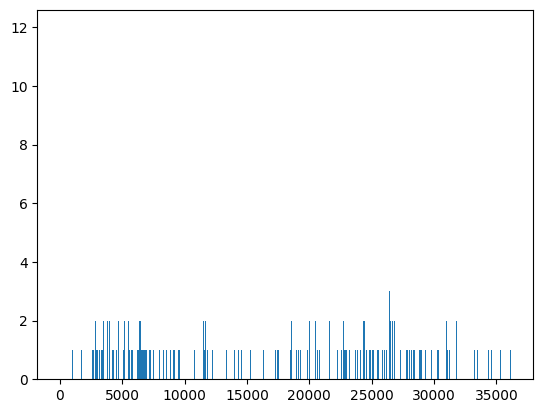

In [49]:
plt.hist(daily['Rented_Bike_Count'], bins=1000)
plt.show()

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gausshyper      5.180577e-07  1834.877395  1877.345102     inf      0.033676   
beta            5.823163e-07  1834.255175  1862.566980     inf      0.040407   
weibull_min     6.527577e-07  1818.522131  1839.755985     inf      0.053557   
chi             6.787229e-07  1845.834488  1867.068341     inf      0.036937   
exponnorm       7.515113e-07  1824.003283  1845.237136     inf      0.044313   

                ks_pvalue  
gausshyper   4.575552e-09  
beta         7.273735e-13  
weibull_min  2.803543e-22  
chi          8.061605e-11  
exponnorm    2.193340e-15

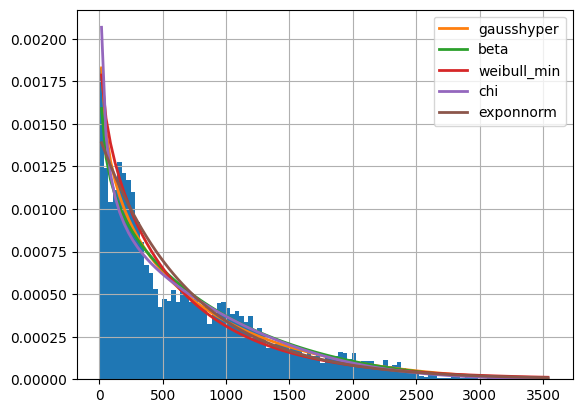

In [50]:
f_Target = Fitter(data['Rented Bike Count'])
f_Target.fit()
f_Target.summary()

IMPORTANT: Now we know what scale the values are on. Time to normalize using gausshyper